## Energy Demand Prediction

In [3]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("EnergyDemand.csv")

In [7]:
data

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [11]:
# converting the timestamp column to the datetime as it showing dates
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

C:\Users\rajni\AppData\Local\Temp\ipykernel_18040\3484730879.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    43848 non-null  datetime64[ns]
 1   hour         43837 non-null  float64       
 2   dayofweek    43839 non-null  float64       
 3   month        43840 non-null  float64       
 4   year         43843 non-null  float64       
 5   dayofyear    43843 non-null  float64       
 6   Temperature  43841 non-null  float64       
 7   Humidity     43838 non-null  float64       
 8   Demand       43841 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.0 MB


### Data Cleaning and preparation

In [16]:
# now lets set the timestamp column as DataFrame's index

data = data.set_index('Timestamp')

In [18]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [20]:
# Using Describe function to check the summary statistics

data[['Temperature', 'Humidity', 'Demand']].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


In [22]:
# next we will check for the missing values in our dataframe

data.isnull().sum()

hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [24]:
# lets see which rows have null values

data[data.isna().any(axis = 1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [26]:
# we can see we have some rows with full null values lets access them 

data[data.isna().all(axis = 1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# hence these columns are fully null so lets remove these 

data = data.dropna(how = 'all')

In [30]:
# we can see that now we have no row having all the rows are null
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,


In [32]:
# now lets fill the row having null values 
# Applying 'ffill' method on columns:- forward fill
data.loc[:, ['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = \
    data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].ffill()


C:\Users\rajni\AppData\Local\Temp\ipykernel_18040\499936891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, ['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = \


In [34]:
# Applying 'bfill' method on columns:- backward fill

data.loc[:, ['Temperature', 'Humidity']] = data[['Temperature', 'Humidity']].bfill()


C:\Users\rajni\AppData\Local\Temp\ipykernel_18040\4278108424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, ['Temperature', 'Humidity']] = data[['Temperature', 'Humidity']].bfill()


In [36]:
# Applying 'interpolate' method on columns

data.loc[:, 'Demand'] = data['Demand'].interpolate(method='time')
# if any data in Demand column is  Nan  than it will replace by the mean of there previous and next value

In [38]:
# now checkin again that is there any column having missing values

data.isnull().sum()

hour           0
dayofweek      0
month          0
year           0
dayofyear      0
Temperature    0
Humidity       0
Demand         0
dtype: int64

In [40]:
data.shape

# after clearing data and removing all null we have this much data

(43844, 8)

### Feature Engneering

In [43]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [45]:
# here we do not have quater of the year data in the dataset so lets insert a column named quarterofyear after dayofyear

data.insert(5, 'quarterofyear', data.index.quarter)


In [47]:
data
# quarter is added on the basis of the index which is date

,hour,dayofweek,month,year,dayofyear,quarterofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,4,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,4,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,4,3.000000,40.565916,4015.979957


In [49]:
# creating weekofyear column

data.insert(5, 'weekofyear', data.index.isocalendar().week.astype(int))

In [51]:
data.sample(10)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarterofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2024-05-17,8.0,4.0,5.0,2024.0,138.0,20,2,42.528382,30.557996,7049.461235
2020-08-11,8.0,1.0,8.0,2020.0,224.0,33,3,38.351532,86.778865,6729.714816
2024-10-27,4.0,6.0,10.0,2024.0,301.0,43,4,13.118023,72.992591,3072.813657
2024-01-25,2.0,3.0,1.0,2024.0,25.0,4,1,7.766260,60.454612,2626.293294
2020-05-25,8.0,0.0,5.0,2020.0,146.0,22,2,39.615047,70.886445,6796.607538
2022-04-28,15.0,3.0,4.0,2022.0,118.0,17,2,34.868305,42.677287,6184.023424
2020-07-12,13.0,6.0,7.0,2020.0,194.0,28,3,50.000000,47.284045,6547.955850
2023-03-17,5.0,4.0,3.0,2023.0,76.0,11,1,19.243298,64.293638,3994.086775
2021-07-01,11.0,3.0,7.0,2021.0,182.0,26,3,45.316392,64.116956,6757.334424


In [53]:
# create a new column to check the weekend or not

data.insert(7, 'is_weekend', data.index.dayofweek.isin([5,6]).astype(int))

# so here we have a new column for checking if date is weekend or not in or and one form
# 1 means weekend

In [55]:
data.sample(10)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarterofyear,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-08-21,8.0,4.0,8.0,2020.0,234.0,34,3,0,43.592058,78.496307,7096.377294
2023-09-01,22.0,4.0,9.0,2023.0,244.0,35,3,0,19.875805,76.987013,4371.196639
2022-12-24,8.0,5.0,12.0,2022.0,358.0,51,4,1,12.526055,62.418215,4016.660252
2020-04-26,8.0,6.0,4.0,2020.0,117.0,17,2,1,37.245297,66.200251,5493.050138
2022-02-10,13.0,3.0,2.0,2022.0,41.0,6,1,0,21.139076,57.544434,5038.087430
2023-12-07,23.0,3.0,12.0,2023.0,341.0,49,4,0,3.000000,77.523530,2928.629480
2021-11-05,23.0,4.0,11.0,2021.0,309.0,44,4,0,3.639365,79.664903,3169.458676
2021-02-26,7.0,4.0,2.0,2021.0,57.0,8,1,0,19.037051,66.292699,4854.370021
2021-03-13,18.0,5.0,3.0,2021.0,72.0,10,1,1,20.568679,20.000000,5144.507462


In [57]:
data.info()

# so many columns are in float64 which is taking more space so lets convert them to int32

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           43844 non-null  float64
 1   dayofweek      43844 non-null  float64
 2   month          43844 non-null  float64
 3   year           43844 non-null  float64
 4   dayofyear      43844 non-null  float64
 5   weekofyear     43844 non-null  int32  
 6   quarterofyear  43844 non-null  int32  
 7   is_weekend     43844 non-null  int32  
 8   Temperature    43844 non-null  float64
 9   Humidity       43844 non-null  float64
 10  Demand         43844 non-null  float64
dtypes: float64(8), int32(3)
memory usage: 3.5 MB


In [59]:
data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].astype(int)

,hour,dayofweek,month,year,dayofyear
Timestamp,,,,,
2020-01-01,0,2,1,2020,1
2020-01-01,1,2,1,2020,1
2020-01-01,2,2,1,2020,1
2020-01-01,3,2,1,2020,1
2020-01-01,4,2,1,2020,1
...,...,...,...,...,...
2024-12-31,19,1,12,2024,366
2024-12-31,20,1,12,2024,366
2024-12-31,21,1,12,2024,366


In [61]:
# saving the changes in the oringal dataset 

data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].astype(int)

C:\Users\rajni\AppData\Local\Temp\ipykernel_18040\992639303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].astype(int)


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           43844 non-null  int32  
 1   dayofweek      43844 non-null  int32  
 2   month          43844 non-null  int32  
 3   year           43844 non-null  int32  
 4   dayofyear      43844 non-null  int32  
 5   weekofyear     43844 non-null  int32  
 6   quarterofyear  43844 non-null  int32  
 7   is_weekend     43844 non-null  int32  
 8   Temperature    43844 non-null  float64
 9   Humidity       43844 non-null  float64
 10  Demand         43844 non-null  float64
dtypes: float64(3), int32(8)
memory usage: 2.7 MB


#### Creating lagged_features : it means data of previous day or previour hour

like here it will energy demand on the previous day on same hour like this

In [66]:
# lag of previous day for the same hour

data['Demand_lag_day'] = data['Demand'].shift(24)

# shifting by 24 hours for getting lag of previous day for same hour

C:\Users\rajni\AppData\Local\Temp\ipykernel_18040\3024240977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Demand_lag_day'] = data['Demand'].shift(24)


In [68]:
# lag of previous week for the same hour

data['Demand_lag_week'] = data['Demand'].shift(168)

# shifting by 168 hours as 24*7 is 168 

C:\Users\rajni\AppData\Local\Temp\ipykernel_18040\987398299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Demand_lag_week'] = data['Demand'].shift(168)


In [70]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarterofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_day,Demand_lag_week
Timestamp,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014


#### creating two more columns
#### 1. Rolling mean
#### 2. Rolling Standart Deviation

`Rolling mean`:-Rolling mean (or moving average) means you calculate the average of a fixed number of recent data points as you move forward through the data.

Ex: we want avg of demand of previous 24 hours demand will be rolling mean of previous day


In [73]:
# rolling mean

data['Demand_rollingmean_day'] = data['Demand'].rolling(window = 24).mean()

# taking window of 24 hours which will give us mean of previous 24 hours

C:\Users\rajni\AppData\Local\Temp\ipykernel_18040\3671883543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Demand_rollingmean_day'] = data['Demand'].rolling(window = 24).mean()


In [75]:
# rolling standaer deviation

data['Demand_rollingstd_day'] = data['Demand'].rolling(window = 24).std()

C:\Users\rajni\AppData\Local\Temp\ipykernel_18040\3284053758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Demand_rollingstd_day'] = data['Demand'].rolling(window = 24).std()


In [77]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarterofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_day,Demand_lag_week,Demand_rollingmean_day,Demand_rollingstd_day
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


In [79]:
# droping all the rows havig any Null value so that our data become more accurate

data = data.dropna()
data

# we have create Demand lag of week therefore we have null value for the first week therefore our data is now staring from 8th Jan

,hour,dayofweek,month,year,dayofyear,weekofyear,quarterofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_day,Demand_lag_week,Demand_rollingmean_day,Demand_rollingstd_day
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


### Data Visualization 

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

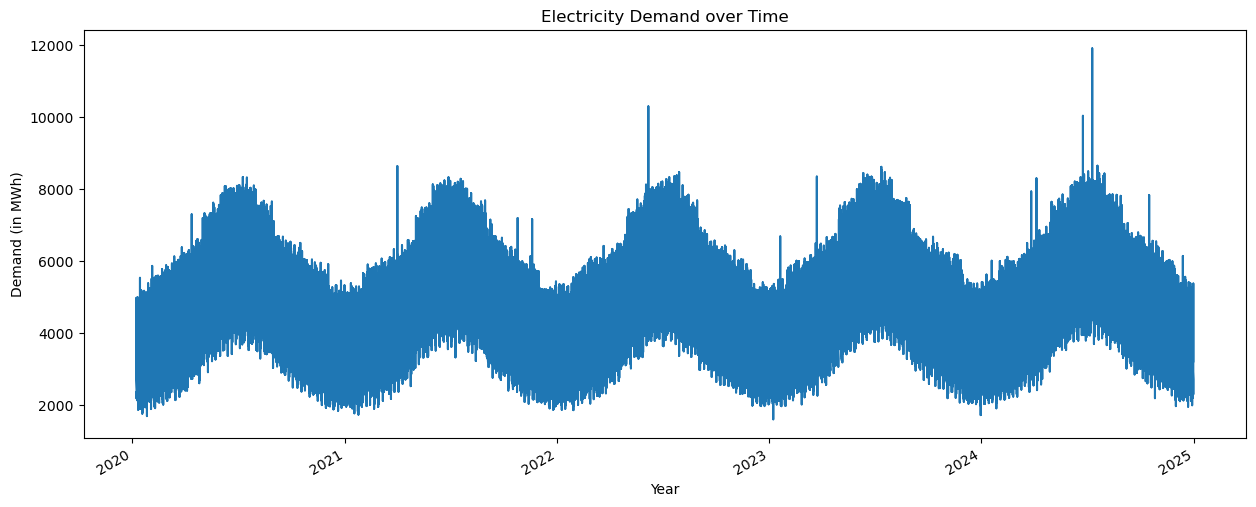

In [83]:
# plotting demand over time

data['Demand'].plot(figsize = (15,6), title = 'Electricity Demand over Time')
plt.xlabel('Year')
plt.ylabel('Demand (in MWh)')
plt.show()

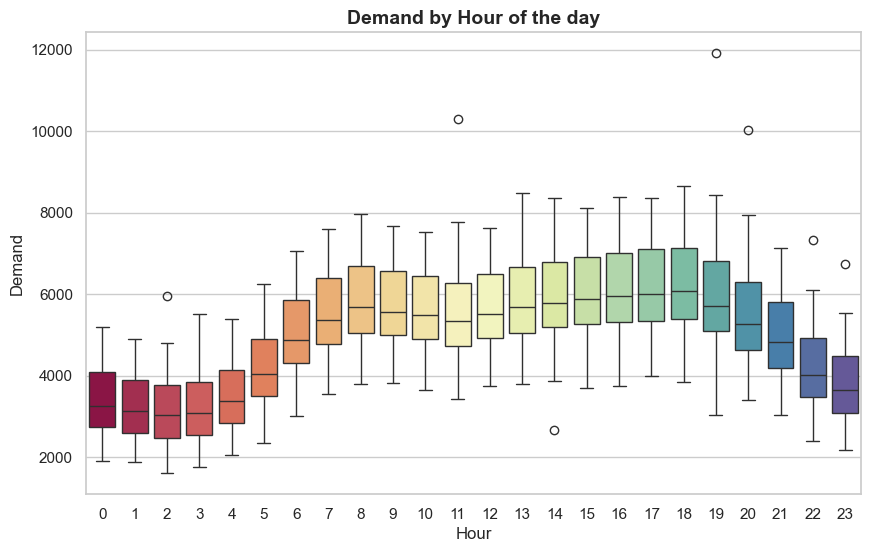

In [84]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # activates a clean, modern theme

sns.boxplot(
    data=data,
    x='hour',
    y='Demand',
    hue='hour',            # use same variable as x
    palette='Spectral',
    legend=False 
)

plt.title("Demand by Hour of the day", fontsize=14, weight='bold')
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Demand", fontsize=12)
plt.show()


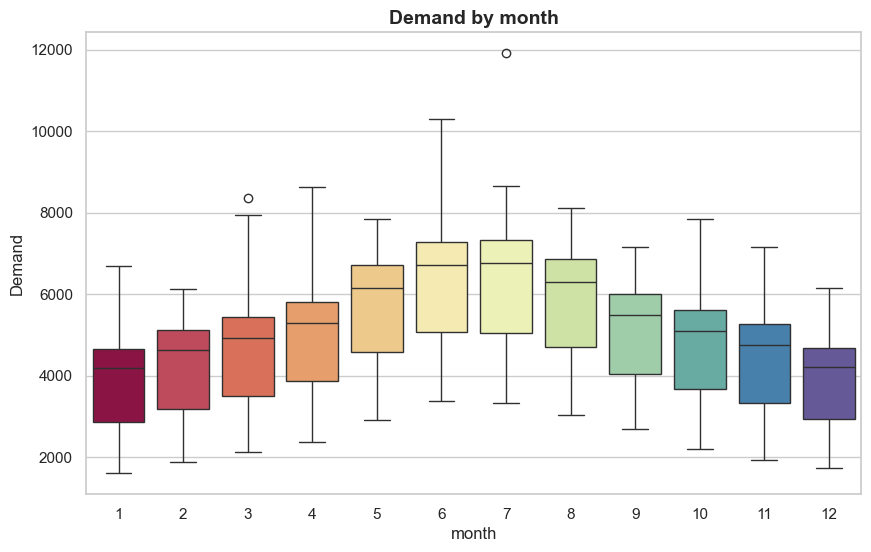

In [85]:
# visualizing demand by month similarly

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # activates a clean, modern theme

sns.boxplot(
    data=data,
    x='month',
    y='Demand',
    hue='month',            # use same variable as x
    palette='Spectral',
    legend=False 
)

plt.title("Demand by month", fontsize=14, weight='bold')
#plt.xlabel("Hour", fontsize=12)
#plt.ylabel("Demand", fontsize=12)
# in sns not needed to give xlabel and ylabel seperatly
plt.show()


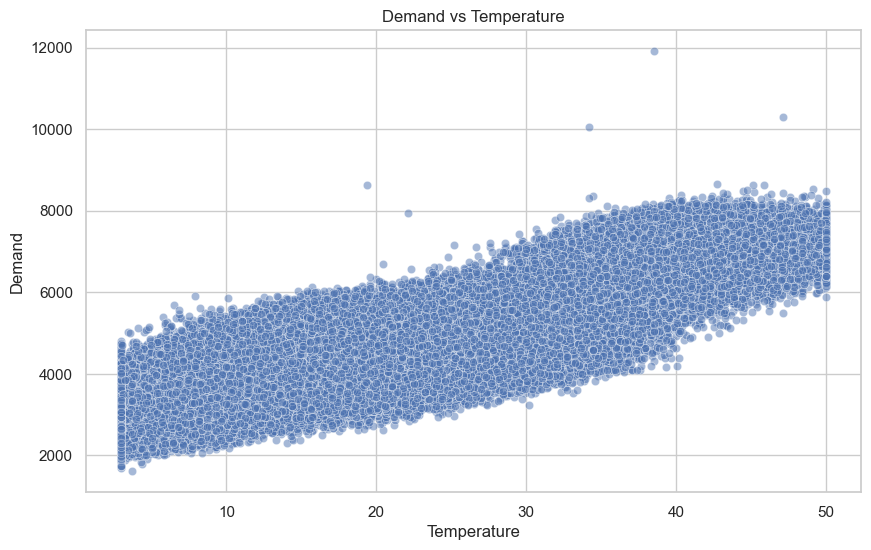

In [88]:
# Scatter plot of Demand vs. Temperature

plt.figure(figsize=(10,6))
sns.scatterplot(
    data = data, 
    x = 'Temperature', 
    y = 'Demand', 
    alpha = 0.5  #alpha - to adjust the tranparency of points
) 
plt.title("Demand vs Temperature")
plt.show()

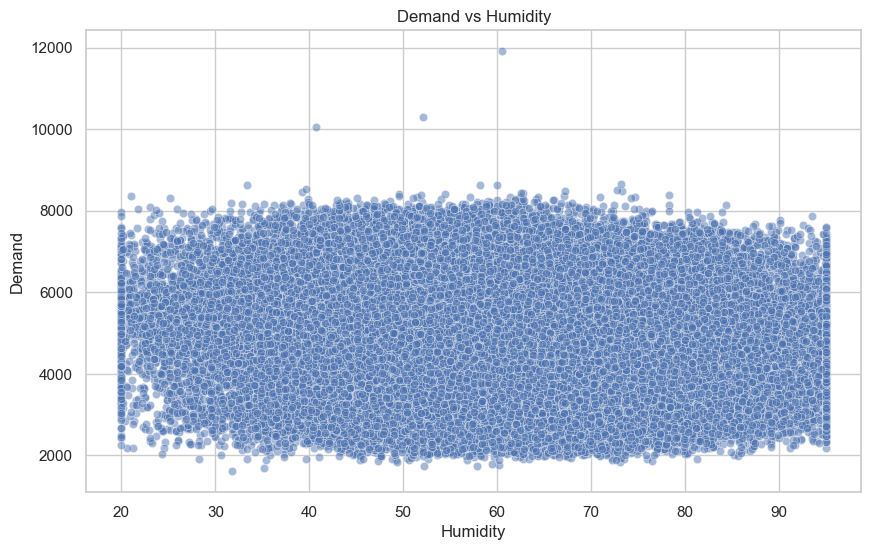

In [91]:
# Scatter plot of Demand vs. Humidity

plt.figure(figsize=(10,6))
sns.scatterplot(
    data = data, 
    x = 'Humidity', 
    y = 'Demand', 
    alpha = 0.5  #alpha - to adjust the tranparency of points
) 
plt.title("Demand vs Humidity")
plt.show()

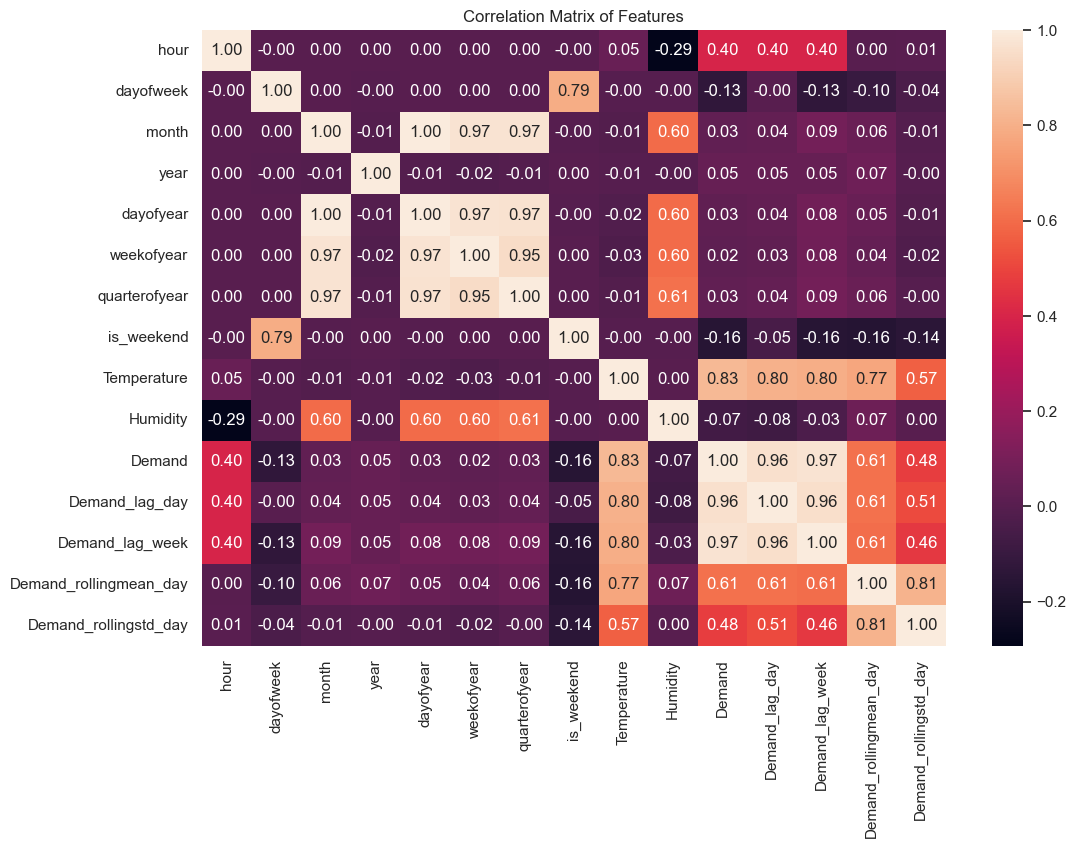

In [94]:
# Correlation Matrix and Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True, fmt=".2f") # anoot=True : to show the numbers , fmt : to adjust decimals
plt.title("Correlation Matrix of Features")
plt.show()

# Machine Learning part:- Model Buildup and training

In [97]:
data.head()

,hour,dayofweek,month,year,dayofyear,weekofyear,quarterofyear,is_weekend,Temperature,Humidity,Demand,Demand_lag_day,Demand_lag_week,Demand_rollingmean_day,Demand_rollingstd_day
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [101]:
# we have 5 years of data from 1 jan 2020 to 31 dec 2024
# we will use first 80% data for training and next 20% for testing
# spliting from 31 dec 2023 for getting first 4 years in training data and next 1 year in testing

split_date = '2023-12-31'  # adjust as per your data timeline
train = data.loc[data.index <= split_date]
test = data.loc[data.index > split_date]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (34892, 15)
Test shape: (8784, 15)


In [103]:
# splitting training data to dependent and independent feature

X_train = train.drop('Demand', axis=1)
y_train = train['Demand']

# Demand col is target feature and rest all are independent features

In [105]:
X_train

,hour,dayofweek,month,year,dayofyear,weekofyear,quarterofyear,is_weekend,Temperature,Humidity,Demand_lag_day,Demand_lag_week,Demand_rollingmean_day,Demand_rollingstd_day
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,6,12,2023,365,52,4,1,6.721774,46.627264,3894.908251,3840.654680,3597.790591,879.089476
2023-12-31,20,6,12,2023,365,52,4,1,7.557696,58.505012,3797.287793,4122.218903,3599.126925,879.430235
2023-12-31,21,6,12,2023,365,52,4,1,3.000000,48.001079,3280.602315,3307.887152,3604.785551,877.726873


In [107]:
y_train

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2023-12-31    4185.721624
2023-12-31    3829.359810
2023-12-31    3416.409325
2023-12-31    3188.143951
2023-12-31    2631.860751
Name: Demand, Length: 34892, dtype: float64

In [109]:
# splitting testing data to dependent and independent feature

X_test = test.drop('Demand', axis=1)
y_test = test['Demand']


In [111]:
X_test

,hour,dayofweek,month,year,dayofyear,weekofyear,quarterofyear,is_weekend,Temperature,Humidity,Demand_lag_day,Demand_lag_week,Demand_rollingmean_day,Demand_rollingstd_day
Timestamp,,,,,,,,,,,,,,
2024-01-01,0,0,1,2024,1,1,1,0,3.000000,65.297046,2373.967493,2752.003113,3626.185642,856.204515
2024-01-01,1,0,1,2024,1,1,1,0,3.000000,69.068654,2328.972904,2419.747602,3640.380403,836.357296
2024-01-01,2,0,1,2024,1,1,1,0,3.000000,80.885372,1729.176090,2292.834087,3669.813854,776.458065
2024-01-01,3,0,1,2024,1,1,1,0,7.788675,66.501527,2257.337352,2507.704476,3685.801618,749.595470
2024-01-01,4,0,1,2024,1,1,1,0,6.607828,57.858109,2516.948873,2690.933257,3692.926651,738.736316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [113]:
y_test

Timestamp
2024-01-01    2720.606072
2024-01-01    2669.647167
2024-01-01    2435.578924
2024-01-01    2641.043699
2024-01-01    2687.949643
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 8784, dtype: float64

In [115]:
print(len(X_train), len(X_test))
print(X_train.index.intersection(X_test.index))


34892 8784
DatetimeIndex([], dtype='datetime64[ns]', name='Timestamp', freq=None)


## Model traing using RandomForest

In [117]:
rf_model = RandomForestRegressor(
    n_estimators=200,       # number of trees
    max_depth=12,           # limit to prevent overfitting
    random_state=42,        # reproducibility
    n_jobs=-1               # use all CPU cores
)

# training the random forest model
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [118]:
# rf_model is trained Now lets do prediction for the test data

y_pred = rf_model.predict(X_test)

In [119]:
y_pred

array([2574.91345621, 2433.38134182, 2386.00111936, ..., 3884.44653816,
       3251.89311922, 3139.78296745])

In [120]:
y_test

Timestamp
2024-01-01    2720.606072
2024-01-01    2669.647167
2024-01-01    2435.578924
2024-01-01    2641.043699
2024-01-01    2687.949643
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 8784, dtype: float64

In [121]:
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 150.11
RMSE: 205.61
R²: 0.979


In [127]:
y_train_pred = rf_model.predict(X_train)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MAE: {mae:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Train RMSE: {rmse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Train R²: {train_r2:.3f}")
print(f"Test R²: {r2:.3f}")


Train MAE: 150.11
Test MAE: 150.11
Train RMSE: 205.61
Test RMSE: 205.61
Train R²: 0.990
Test R²: 0.979


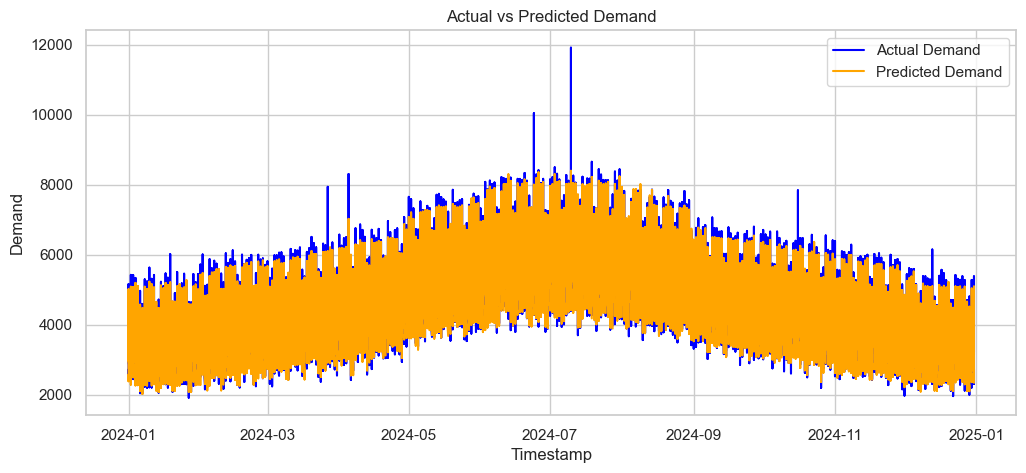

In [129]:
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual Demand', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Demand', color='orange')
plt.legend()
plt.title('Actual vs Predicted Demand')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.show()


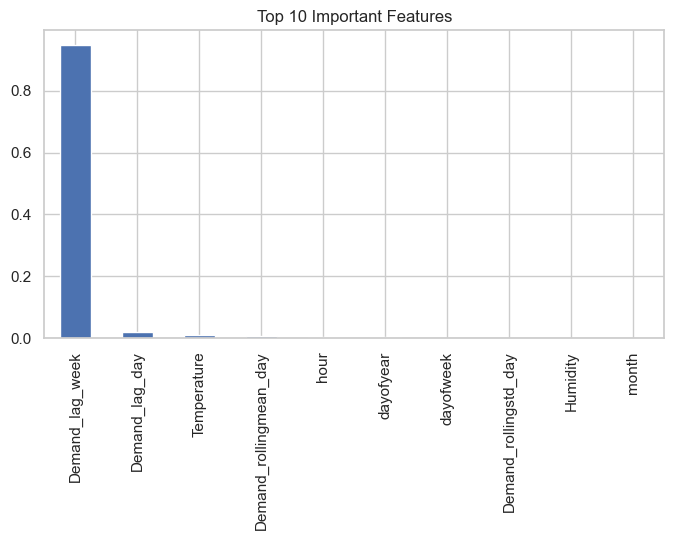

In [131]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,4))
plt.title('Top 10 Important Features')
plt.show()


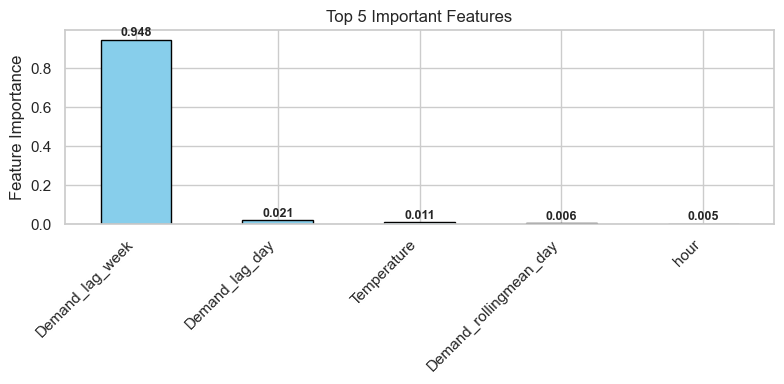

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances as a sorted Series
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8, 4))
bars = top_features.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 5 Important Features')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45, ha='right')

# Adding numeric notation on every bar for knowing its value
for i, value in enumerate(top_features):
    plt.text(i, value + 0.002, f"{value:.3f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


## Model Training using XGBoost

In [145]:
from xgboost import XGBRegressor


In [147]:
# initialize the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,      
    max_depth=12,          
    learning_rate=0.05,    
    subsample=0.8,         
    colsample_bytree=0.8,  
    random_state=42,       
    n_jobs=-1              
)

In [155]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

### Performance metric for XGBoost

In [157]:
y_predXG = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_predXG)
rmse = np.sqrt(mean_squared_error(y_test, y_predXG))
r2 = r2_score(y_test, y_predXG)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 150.11
RMSE: 205.61
R²: 0.979


### Performance metric for RandomForest

In [161]:
y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


MAE: 150.11
RMSE: 205.61
R²: 0.979


### lets predict this using LinearRegression and Decisiontree

`Conclusion:`
- Our data is slighly simple but model is not learning noise
- model is performing similar on four different ml model
- which signifies our data is ok there is no underfitting or overfittig

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [165]:
# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Evaluation
train_mae_lr = mean_absolute_error(y_train, y_pred_train_lr)
test_mae_lr = mean_absolute_error(y_test, y_pred_test_lr)

train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))

train_r2_lr = r2_score(y_train, y_pred_train_lr)
test_r2_lr = r2_score(y_test, y_pred_test_lr)

print("----- Linear Regression -----")
print(f"Train MAE: {train_mae_lr:.2f}")
print(f"Test MAE: {test_mae_lr:.2f}")
print(f"Train RMSE: {train_rmse_lr:.2f}")
print(f"Test RMSE: {test_rmse_lr:.2f}")
print(f"Train R²: {train_r2_lr:.3f}")
print(f"Test R²: {test_r2_lr:.3f}")


----- Linear Regression -----
Train MAE: 180.92
Test MAE: 180.63
Train RMSE: 234.35
Test RMSE: 243.14
Train R²: 0.972
Test R²: 0.970


In [167]:
# Initialize and train
dt_model = DecisionTreeRegressor(max_depth=12, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Evaluation
train_mae_dt = mean_absolute_error(y_train, y_pred_train_dt)
test_mae_dt = mean_absolute_error(y_test, y_pred_test_dt)

train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))
test_rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))

train_r2_dt = r2_score(y_train, y_pred_train_dt)
test_r2_dt = r2_score(y_test, y_pred_test_dt)

print("\n----- Decision Tree -----")
print(f"Train MAE: {train_mae_dt:.2f}")
print(f"Test MAE: {test_mae_dt:.2f}")
print(f"Train RMSE: {train_rmse_dt:.2f}")
print(f"Test RMSE: {test_rmse_dt:.2f}")
print(f"Train R²: {train_r2_dt:.3f}")
print(f"Test R²: {test_r2_dt:.3f}")



----- Decision Tree -----
Train MAE: 123.70
Test MAE: 186.93
Train RMSE: 164.09
Test RMSE: 254.99
Train R²: 0.986
Test R²: 0.967
